
https://www.youtube.com/watch?v=BzcBsTou0C0&t=1s

Neural Networks and Pytorch Introduction P.1:
- Fully connected network all parameters are connected to the next level
- Input->HiddenLv1->HiddenLv2->Output
- Input multiplied by weight then summed with all inputs with Sigma
- Sent to an "Activator" which decides whether to send signal (0, 1)
- 3 blue 1 brown Youtube

In [7]:
import torch

x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x * y)


tensor([10.,  3.])


In [8]:
x = torch.zeros([2, 5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [9]:
x.shape

torch.Size([2, 5])

In [10]:
y = torch.rand([2, 5])
y

tensor([[0.9417, 0.7345, 0.6188, 0.4575, 0.4754],
        [0.9327, 0.2660, 0.6170, 0.4711, 0.6682]])

In [11]:
"""flatten element"""
y = y.view([1, 10])
y

tensor([[0.9417, 0.7345, 0.6188, 0.4575, 0.4754, 0.9327, 0.2660, 0.6170, 0.4711,
         0.6682]])


https://www.youtube.com/watch?v=i2yPxY2rOzs

Data - Deep Learning and Neural networks with Python and Pytorch P.2:
- pip install torchvision
- neural networks solve vision tasks (tends to be with vision)
- torchvision has data
- out of sample data: data the machine hasn't touched/used before
- BATCH: how much data is fed through at a time (usually 8-64)
- people like base 8 for some reason
- BALANCING: if model can find shorter path to reduce loss, as optimzer reduces loss, it doesn't know how much it can reduce to; e.i might get STUCK.
    - thus make sure data is balanced: weights of specific classes are more equal
- LOSS: measured at output from neural network


In [12]:
import torch
import torchvision
from torchvision import transforms, datasets

In [13]:
"define two different datasets"
train = datasets.MNIST("", train=True, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))

In [14]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [15]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [16]:
x, y = data[0][0], data[1][0]
print(y)

tensor(4)


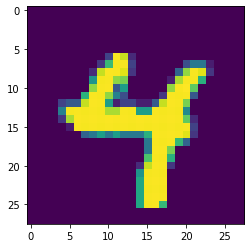

In [26]:
import matplotlib.pyplot as plt

#can't show as 1x28x28 so view in 28x28 correcting format to view it
plt.imshow(data[0][0].view(28, 28))
plt.show()

In [18]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [35]:
#looking at weight for each data class
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [36]:
#weight percentage of entire dataset: this looks pretty balanced
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
